
# <font color='blue'>VPL_Consultoria</font>

## <font color='blue'>Inteligência Artificial Para Prever o Preço de Ativos Financeiros</font>

## Instalando e Carregando Pacotes

In [60]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

https://finance.yahoo.com/

https://pypi.org/project/yfinance/

In [61]:
!pip install -q yfinance

In [62]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [63]:
%reload_ext watermark
%watermark -a "VPL_Consultoria"

Author: VPL_Consultoria



## Extração dos Dadoa via API

In [64]:
# Extrai os dados via API
dados = yf.Ticker("^GSPC")

**"^GSPC"**: é o símbolo (ticker) que representa o índice S&P 500 no Yahoo Finance. O S&P 500 é um índice que reflete a performance de 500 das maiores empresas listadas nas bolsas de valores dos Estados Unidos, sendo amplamente considerado como um dos melhores indicadores da performance do mercado de ações.

https://finance.yahoo.com/quote/%5EGSPC/

Você pode customizar o projeto com outros Tickers:

https://stockanalysis.com/list/nasdaq-stocks/

In [65]:
type(dados)

yfinance.ticker.Ticker

In [66]:
# Obtemos o histórico de preços do índice S&P 500 ao longo do tempo máximo disponível
df_vpl = dados.history(period = "max")

## Análise Exploratória dos Dados

In [67]:
# Shape
df_vpl.shape

(24524, 7)

In [68]:
# Dados extraídos
df_vpl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [69]:
# Dados extraídos
df_vpl.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-08-13 00:00:00-04:00,6462.669922,6480.279785,6445.020020,6466.580078,5195950000,0.0,0.0
2025-08-14 00:00:00-04:00,6453.459961,6473.919922,6441.069824,6468.540039,4462050000,0.0,0.0
2025-08-15 00:00:00-04:00,6477.379883,6481.339844,6441.850098,6449.799805,4575060000,0.0,0.0
2025-08-18 00:00:00-04:00,6445.020020,6455.350098,6437.700195,6449.149902,4162290000,0.0,0.0
2025-08-19 00:00:00-04:00,6446.240234,6456.479980,6400.220215,6411.370117,4377440000,0.0,0.0


**ATENÇÃO: Quando você executar o projeto seus dados serão diferentes, pois estamos extraindo todos os dados até a data de execução do projeto. O projeto irá funcionar da mesma forma, mas os resultados e conclusões poderão ser diferentes.**

In [70]:
# Índice
df_vpl.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-08-06 00:00:00-04:00', '2025-08-07 00:00:00-04:00',
               '2025-08-08 00:00:00-04:00', '2025-08-11 00:00:00-04:00',
               '2025-08-12 00:00:00-04:00', '2025-08-13 00:00:00-04:00',
               '2025-08-14 00:00:00-04:00', '2025-08-15 00:00:00-04:00',
               '2025-08-18 00:00:00-04:00', '2025-08-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24524, freq=None)

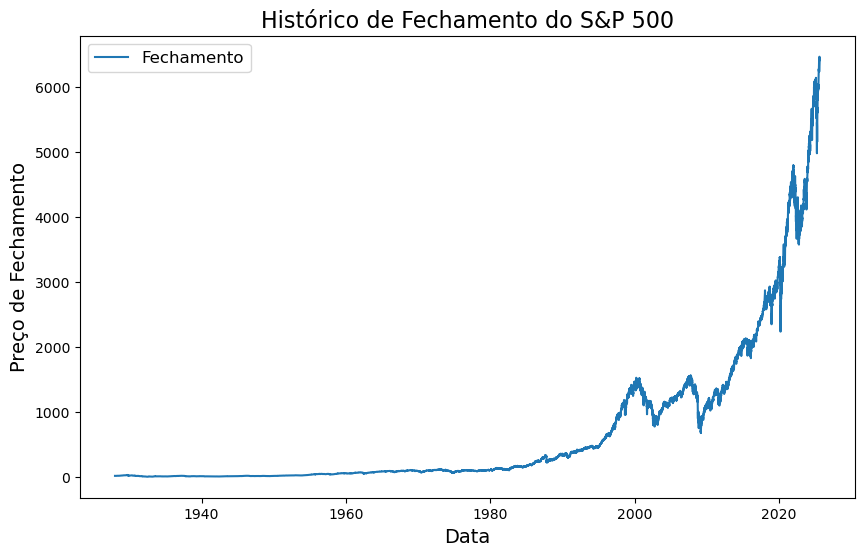

In [71]:
# Define o tamanho do gráfico
plt.figure(figsize = (10, 6))

# Cria o gráfico de linha para a coluna 'Close'
plt.plot(df_vpl.index, df_vpl['Close'], label = 'Fechamento') 

# Adiciona um título ao gráfico
plt.title('Histórico de Fechamento do S&P 500', fontsize = 16)

# Adiciona rótulos aos eixos
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Preço de Fechamento', fontsize = 14)

# Mostra a legenda
# O parâmetro loc controla a posição da legenda. Ex: 'upper left', 'upper right', 'lower left', 'lower right'
plt.legend(loc = 'best', fontsize = 12)

# Mostra o gráfico
plt.show()

In [72]:
# Deleta as colunas que não serão usadas
del df_vpl["Dividends"]
del df_vpl["Stock Splits"]

In [73]:
df_vpl.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [74]:
df_vpl.describe()

,Open,High,Low,Close,Volume
count,24524.000000,24524.000000,24524.000000,24524.000000,2.452400e+04
mean,691.973850,695.997952,687.702878,692.123241,9.458817e+08
std,1160.759046,1167.064135,1154.009253,1160.990873,1.658010e+09
min,4.400000,4.400000,4.400000,4.400000,0.000000e+00
25%,24.850000,24.850000,24.850000,24.850000,1.580000e+06
50%,103.150002,103.985001,102.305000,103.165001,2.137000e+07
75%,1074.552551,1083.732544,1065.602478,1074.242523,1.111725e+09
max,6477.379883,6481.339844,6445.020020,6468.540039,1.145623e+10


## Engenharia de Atributos

Vamos preparar a variável alvo.

In [75]:
df_vpl.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2025-08-13 00:00:00-04:00,6462.669922,6480.279785,6445.020020,6466.580078,5195950000
2025-08-14 00:00:00-04:00,6453.459961,6473.919922,6441.069824,6468.540039,4462050000
2025-08-15 00:00:00-04:00,6477.379883,6481.339844,6441.850098,6449.799805,4575060000
2025-08-18 00:00:00-04:00,6445.020020,6455.350098,6437.700195,6449.149902,4162290000
2025-08-19 00:00:00-04:00,6446.240234,6456.479980,6400.220215,6411.370117,4377440000


In [76]:
# Cria nova variável
df_vpl["Tomorrow"] = df_vpl["Close"].shift(-1)

A linha de código acima é usada para criar uma nova coluna no DataFrame df_vpl chamada "Tomorrow", que armazena os valores da coluna "Close" deslocados uma linha para cima. 

O método shift() é usado para deslocar os dados na coluna para cima ou para baixo. O argumento -1 indica que os dados devem ser deslocados uma linha para cima. Isso significa que cada valor na nova coluna "Tomorrow" será o valor de "Close" do próximo dia de negociação. Por exemplo, o valor de "Tomorrow" para o dia 1 de janeiro seria o valor de "Close" para o dia 2 de janeiro, e assim por diante. 

O último valor na coluna "Tomorrow" será NaN (Not a Number), pois não há um próximo dia para o último registro no DataFrame.

In [77]:
df_vpl

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-08-13 00:00:00-04:00,6462.669922,6480.279785,6445.020020,6466.580078,5195950000,6468.540039
2025-08-14 00:00:00-04:00,6453.459961,6473.919922,6441.069824,6468.540039,4462050000,6449.799805
2025-08-15 00:00:00-04:00,6477.379883,6481.339844,6441.850098,6449.799805,4575060000,6449.149902


In [78]:
# Filtra os dados a partir de 1990
df_vpl = df_vpl.loc["1990-01-01":].copy()

O método loc é usado para acessar um grupo de linhas e colunas por rótulos ou uma matriz booleana no DataFrame. 

Neste caso, "1990-01-01": especifica um intervalo de datas a partir de 1º de janeiro de 1990 até o final do conjunto de dados. O uso do : sem especificar uma data de término indica que a seleção deve incluir todas as linhas a partir da data de início até a última linha disponível no DataFrame. O DataFrame df_vpl precisa ter um índice de tipo DateTime para que essa operação de filtragem baseada em data funcione corretamente.

.copy(): Este método cria uma cópia profunda do DataFrame resultante da operação de filtragem. Sem .copy(), a variável df_vpl apontaria para um subconjunto do DataFrame original, mantendo uma ligação com o DataFrame original. Isso poderia gerar erros em algumas operações devido a tentativas de modificar um recorte de um DataFrame sem criar uma cópia explicitamente. Usar .copy() garante que as modificações feitas na cópia não afetarão o DataFrame original e vice-versa.

In [79]:
df_vpl

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995
...,...,...,...,...,...,...
2025-08-13 00:00:00-04:00,6462.669922,6480.279785,6445.020020,6466.580078,5195950000,6468.540039
2025-08-14 00:00:00-04:00,6453.459961,6473.919922,6441.069824,6468.540039,4462050000,6449.799805
2025-08-15 00:00:00-04:00,6477.379883,6481.339844,6441.850098,6449.799805,4575060000,6449.149902


In [80]:
# Drop de valores NA
df_vpl = df_vpl.dropna()

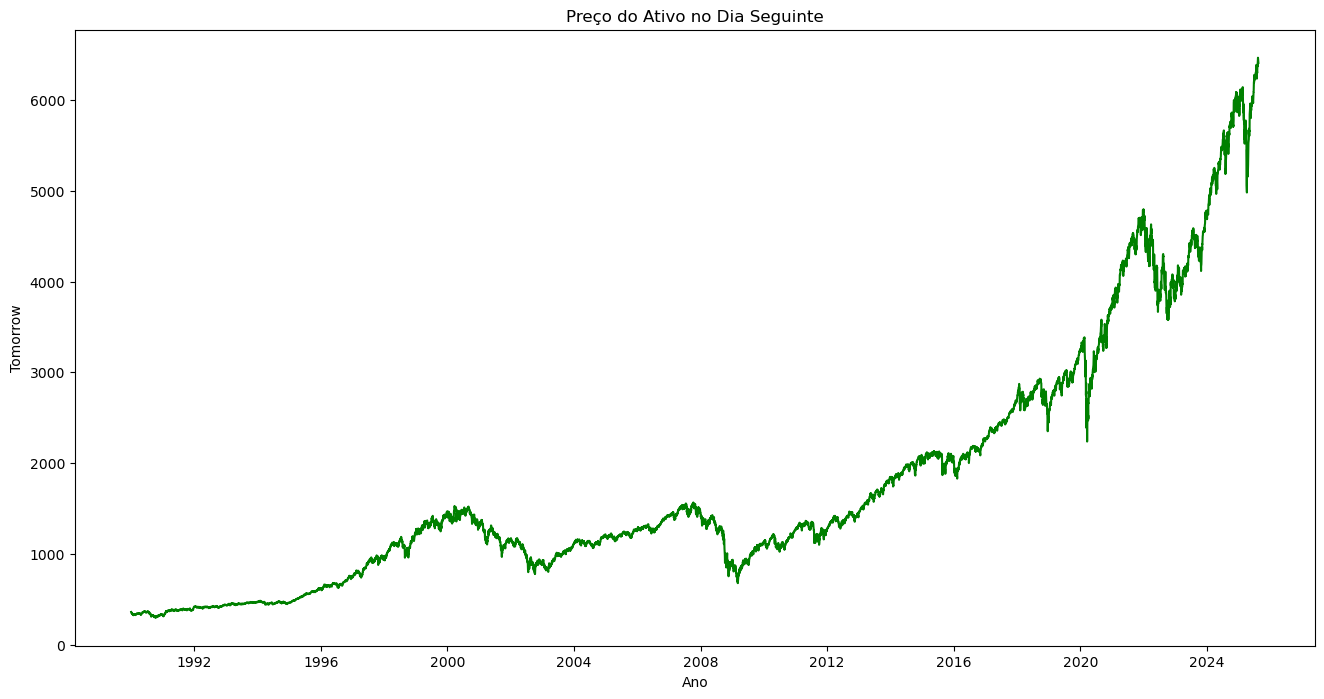

In [81]:
# Plot
plt.figure(figsize = (16,8))
plt.title('Preço do Ativo no Dia Seguinte')
plt.xlabel('Ano')
plt.ylabel('Tomorrow')
plt.plot(df_vpl['Tomorrow'], color = 'green')
plt.show()

## Definindo Variáveis de Entrada e Saída

In [82]:
# Variáveis de entrada
x = df_vpl[['Open', 'High', 'Low', 'Close', 'Volume']]

In [83]:
# Variável de saída (valor de Close do dia seguinte)
y = df_vpl['Tomorrow']

In [84]:
x

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000
...,...,...,...,...,...
2025-08-12 00:00:00-04:00,6395.169922,6446.549805,6385.759766,6445.759766,5135300000
2025-08-13 00:00:00-04:00,6462.669922,6480.279785,6445.020020,6466.580078,5195950000
2025-08-14 00:00:00-04:00,6453.459961,6473.919922,6441.069824,6468.540039,4462050000


In [85]:
y

Date
1990-01-02 00:00:00-05:00     358.760010
1990-01-03 00:00:00-05:00     355.670013
1990-01-04 00:00:00-05:00     352.200012
1990-01-05 00:00:00-05:00     353.790009
1990-01-08 00:00:00-05:00     349.619995
                                ...     
2025-08-12 00:00:00-04:00    6466.580078
2025-08-13 00:00:00-04:00    6468.540039
2025-08-14 00:00:00-04:00    6449.799805
2025-08-15 00:00:00-04:00    6449.149902
2025-08-18 00:00:00-04:00    6411.370117
Name: Tomorrow, Length: 8973, dtype: float64

Ficou claro por que removemos o valor NaN da última linha da série?

## Pré-Processamento dos Dados

In [86]:
# Separa os dados em amostra de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [87]:
# Cria o padronizador
scaler = StandardScaler()

In [88]:
# Treina o padronizador
scaler.fit(x_treino)

StandardScaler()

In [89]:
# Aplica o padronizador
x_treino_scaled = scaler.transform(x_treino)

In [90]:
x_treino_scaled

array([[-0.31427184, -0.32024893, -0.31218114, -0.31628678,  0.73899122],
       [ 0.78153526,  0.77631035,  0.78544599,  0.78153787,  0.60342632],
       [-0.09138337, -0.08674844, -0.08395611, -0.08538889,  0.31632158],
       ...,
       [-0.30538483, -0.3081407 , -0.30340985, -0.30471333,  0.57803767],
       [-0.96879387, -0.9680842 , -0.96595148, -0.96553718, -1.215801  ],
       [ 0.73106407,  0.73351391,  0.7422167 ,  0.74339505,  0.53398751]],
      shape=(7178, 5))

In [91]:
# Aplica o padronizador
x_teste_scaled = scaler.transform(x_teste)

In [92]:
x_teste_scaled

array([[ 0.21393846,  0.21751079,  0.2232553 ,  0.22141585,  0.51464097],
       [-1.03865766, -1.04079317, -1.0375998 , -1.03915012, -1.27386737],
       [ 0.13618253,  0.13280421,  0.14238784,  0.13951063,  0.22757905],
       ...,
       [-0.57956869, -0.5745161 , -0.57756657, -0.57182378, -1.06094308],
       [ 0.24954604,  0.24596792,  0.25604127,  0.2506501 ,  0.54115348],
       [ 0.78402251,  0.7834837 ,  0.7952027 ,  0.78856062,  0.7283038 ]],
      shape=(1795, 5))

## Modelagem Preditiva

O modelo de regressão linear é usado para modelar a relação entre uma variável dependente (ou variável de resposta) e uma ou mais variáveis independentes (ou preditores). O objetivo é prever o valor da variável dependente com base nos valores das variáveis independentes, assumindo que a relação entre elas é linear. Existem dois tipos principais de regressão linear: simples e múltipla. Aqui usaremos regressão linear múltipla (quando temos mais de uma variável de entrada).

O ajuste do modelo de regressão linear envolve encontrar os valores dos coeficientes que minimizam a soma dos quadrados dos resíduos (diferença entre os valores observados e os valores previstos). Isso é comumente feito usando o método dos mínimos quadrados.

A qualidade do ajuste do modelo é frequentemente avaliada usando o coeficiente de determinação (R2), que mede a proporção da variância na variável dependente que é previsível a partir das variáveis independentes. Outras métricas, como o erro quadrático médio (MSE) e o erro quadrático médio da raiz (RMSE), também são usadas para avaliar o desempenho do modelo.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [93]:
# Cria o modelo
modelo_vpl = LinearRegression()

In [94]:
# Treina o modelo
modelo_vpl.fit(x_treino_scaled, y_treino)

LinearRegression()

In [95]:
modelo_vpl.coef_

array([-4.08930096e+00,  2.05456345e+02,  2.06970868e+02,  9.39203009e+02,
       -7.44001922e-02])

In [96]:
modelo_vpl.intercept_

np.float64(1754.6698326521114)

Fórmula da Regressão Linear Múltipla (para este modelo que criamos com 5 variáveis de entrada):

y = b0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5

In [97]:
# Previsões com o modelo
y_pred = modelo_vpl.predict(x_teste_scaled)

In [98]:
y_pred

array([2052.60742988,  354.44858187, 1941.88041596, ...,  982.48275518,
       2092.54918754, 2817.58353606], shape=(1795,))

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
Leia o material no Capítulo 4 com a descrição das métricas.

In [99]:
print('MSE:', metrics.mean_squared_error(y_teste, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred))
print('R2:', metrics.r2_score(y_teste, y_pred))

MSE: 613.6992812935902
RMSE: 24.77295463390651
MAE: 13.761858741372581
R2: 0.9996899444363088


In [100]:
# Cria um dataframe comparando valor real e valor previsto
df_resultado = pd.DataFrame({'Real':y_teste, 'Previsto':y_pred, 'Erro':abs(y_teste - y_pred)})

In [101]:
df_resultado

,Real,Previsto,Erro
Date,,,
2016-05-20 00:00:00-04:00,2048.040039,2052.607430,4.567391
1990-05-15 00:00:00-04:00,354.000000,354.448582,0.448582
2014-06-17 00:00:00-04:00,1956.979980,1941.880416,15.099565
2017-02-08 00:00:00-05:00,2307.870117,2294.504207,13.365911
1996-08-01 00:00:00-04:00,662.489990,648.921761,13.568229
...,...,...,...
1993-06-25 00:00:00-04:00,451.850006,447.922090,3.927916
2000-09-20 00:00:00-04:00,1449.050049,1450.312488,1.262440
1997-12-05 00:00:00-05:00,982.369995,982.482755,0.112760


Text(0.5, 1.0, 'Real x Previsto')

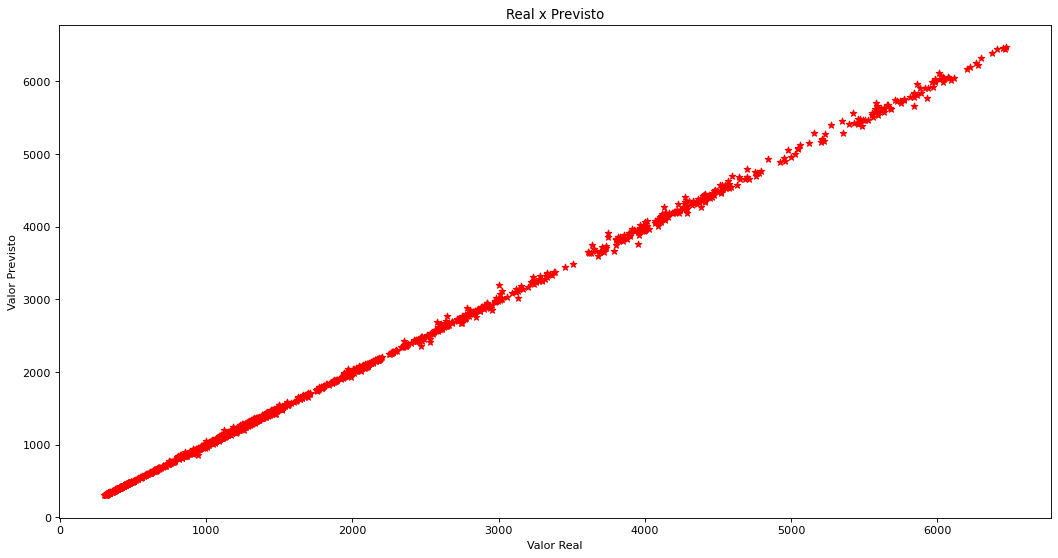

In [102]:
# Plot
plt.figure(figsize = (16,8), dpi = 80)
plt.scatter(y_teste, y_pred, color = 'red', marker = '*')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Real x Previsto')

## Deploy e Uso do Modelo Para Prever o Valor de Ativos Financeiros

In [103]:
# Novos dados de entrada para previsão (por exemplo, valores dos indicadores ao final de uma segunda-feira)
novos_dados = pd.DataFrame({
    'Open': [3200.00],
    'High': [3250.00],
    'Low': [3180.00],
    'Close': [3225.00],
    'Volume': [5000000000]
})

In [104]:
# Padronizar os novos dados de entrada usando o mesmo scaler usado nos dados de treino
novos_dados_scaled = scaler.transform(novos_dados)

In [105]:
# Fazer a previsão usando o modelo
previsao_tomorrow = modelo_vpl.predict(novos_dados_scaled)

In [106]:
# Exibir a previsão (por exemplo, valor de fechamento da terça-feira)
print("Previsão do valor de fechamento para o próximo dia:", previsao_tomorrow[0])

Previsão do valor de fechamento para o próximo dia: 3223.3760692001892


> Vamos testar o modelo com dados que conhecemos:

No dia 04/06/2025, estes foram os valores de entrada: 5938.560059, 5981.350098, 5929.000000, 5970.370117, 5026680000

No dia 05/06/2025, este foi o valor de fechamento (Close): 5970.810059

Vamos ver se o modelo consegue prever esse valor do dia 05/06 (valor que já conhecemos)!

In [107]:
# Novos dados de entrada para previsão (por exemplo, valores dos indicadores ao final de uma segunda-feira)
novos_dados = pd.DataFrame({
    'Open': [5938.560059],
    'High': [5981.350098],
    'Low': [5929.000000],
    'Close': [5970.370117],
    'Volume': [5026680000]
})

In [108]:
# Padronizar os novos dados de entrada usando o mesmo scaler usado nos dados de treino
novos_dados_scaled = scaler.transform(novos_dados)

In [109]:
# Fazer a previsão usando o modelo
previsao_tomorrow = modelo_vpl.predict(novos_dados_scaled)

In [110]:
# Exibir a previsão (por exemplo, valor de fechamento da terça-feira)
print("Previsão do valor de fechamento para o próximo dia:", previsao_tomorrow[0])

Previsão do valor de fechamento para o próximo dia: 5968.519428758629


Margem de erro inferior a 1%. Projeto concluído com sucesso! Partimos para o próximo projeto.

In [111]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



No dia 04/06/2025, estes foram os valores de entrada: 5978.939941, 5990.479980, 5966.109863, 5970.810059, 4767050000

No dia 05/06/2025, este foi o valor de fechamento (Close) pelo modelo: 5977.352446662526

Vamos ver se o modelo conseguiu prever esse valor do dia 05/06 (valor que não conhecemos)!

In [112]:
# Novos dados de entrada para previsão (por exemplo, valores dos indicadores ao final de uma segunda-feira)
novos_dados = pd.DataFrame({
    'Open': [5978.939941],
    'High': [5990.479980],
    'Low': [5966.109863],
    'Close': [5970.810059],
    'Volume': [4767050000]
})

In [113]:
# Padronizar os novos dados de entrada usando o mesmo scaler usado nos dados de treino
novos_dados_scaled = scaler.transform(novos_dados)

In [114]:
# Fazer a previsão usando o modelo
previsao_tomorrow = modelo_vpl.predict(novos_dados_scaled)

In [115]:
# Exibir a previsão (por exemplo, valor de fechamento da terça-feira)
print("Previsão do valor de fechamento para o próximo dia:", previsao_tomorrow[0])

Previsão do valor de fechamento para o próximo dia: 5975.833228777459


In [116]:
#%watermark -v -m

In [117]:
#%watermark --iversions

# Fim